In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.api import VAR, VARMAX

In [47]:
df = pd.read_csv('alt_data/complete_final_data.csv', index_col= 'DATE')

In [48]:
df

,avg_weeks_unemployed,cont_claims_insur_unemploy,full_employ_level,part_employ_level,not_in_labor_force,gov_unemp_insur,labor_particip_women,labor_particip_men,labor_particip_total,real_estate_loans,...,unemploy_rate,insured_unemploy_rate,target_retail,target_mining_logging,target_construction,target_edu_health,target_manufacturing,target_prof_business,target_gov,target_leisure_hospitality
DATE,,,,,,,,,,,,,,,,,,,,,
1975-01,10.7,3619250.0,85627.0,4133.0,58627.0,12.0,46.3,78.3,61.4,130.0257,...,8.1,5.500,8518.9,789,3841,5404,17344,6006,14624,5476
1975-02,11.7,3856500.0,85256.0,3994.0,59214.0,14.0,45.9,78.0,61.0,130.6318,...,8.1,5.875,8528.5,790,3718,5421,17004,6002,14747,5484
1975-03,11.8,4175200.0,85187.0,4087.0,59052.0,16.5,46.2,78.0,61.2,131.1786,...,8.6,6.340,8526.7,793,3628,5430,16853,5999,14754,5488
1975-04,12.9,4473500.0,85189.0,4179.0,59044.0,18.8,46.3,78.1,61.3,131.6391,...,8.8,6.750,8492.9,785,3565,5435,16759,5994,14795,5472
1975-05,13.4,4578200.0,85451.0,3972.0,58820.0,19.6,46.4,78.3,61.5,131.7233,...,9.0,6.880,8538.5,799,3552,5468,16746,6022,14827,5502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10,21.4,7942600.0,149669.0,6668.0,100207.0,304.3,55.8,67.7,61.6,4680.5019,...,6.9,5.400,15131.8,594,7329,23235,12155,20296,21583,13622
2020-11,23.0,5941750.0,149809.0,6641.0,100548.0,280.8,55.9,67.4,61.5,4667.5872,...,6.7,4.050,15129.7,597,7353,23278,12196,20391,21488,13632
2020-12,23.4,5274750.0,149830.0,6170.0,100663.0,304.3,55.9,67.4,61.5,4659.1834,...,6.7,3.600,15159.8,597,7400,23249,12231,20550,21456,13134


In [49]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

In [50]:
interpret_dftest(adfuller(df['avg_weeks_unemployed']))

Test Statistic    -1.896020
p-value            0.333936
Lag Used          19.000000
dtype: float64

In [51]:
adfuller(df['avg_weeks_unemployed'])

(-1.8960196808936844,
 0.33393588911181404,
 19,
 534,
 {'1%': -3.4426552678216003,
  '5%': -2.8669676577777548,
  '10%': -2.569660749624767},
 1389.6318077965884)

In [52]:
x =interpret_dftest(adfuller(df['avg_weeks_unemployed'].diff(1).diff(1).dropna()))

In [53]:
x

Test Statistic   -7.580128e+00
p-value           2.695681e-11
Lag Used          1.800000e+01
dtype: float64

In [54]:
target = ['target_mining_logging', 'target_construction', 'target_edu_health',
       'target_manufacturing', 'target_prof_business', 'target_gov',
       'target_leisure_hospitality']

In [55]:
for column in df[target].columns:
    
    test = interpret_dftest(adfuller(df[column].dropna()))
    
    if test[1] > 0.01:
        
        test = interpret_dftest(adfuller(df['avg_weeks_unemployed'].diff(1).dropna()))
        df[f'{column}_first_diff']  = df[column].diff(1)
        
        if test[1] > 0.01:
            
            test = interpret_dftest(adfuller(df['avg_weeks_unemployed'].diff(1).diff(1).dropna()))
            df.drop(columns = [f'{column}_first_diff'], inplace = True)
            df[f'{column}_second_diff']  = df[column].diff(1).diff(1)
                       

In [56]:
df.columns

Index(['avg_weeks_unemployed', 'cont_claims_insur_unemploy',
       'full_employ_level', 'part_employ_level', 'not_in_labor_force',
       'gov_unemp_insur', 'labor_particip_women', 'labor_particip_men',
       'labor_particip_total', 'real_estate_loans', 'consumer_loans',
       'commerc_indust_loans', 'm1_real', 'unemp_less_five_weeks',
       'unemp_5_to_14_wks', 'unemp_15_to_26_wks', 'unemp_over_27_wks',
       'personal_consum_exp', 'personal_save_rate', 'emp_pop_ratio',
       'unemploy_rate', 'insured_unemploy_rate', 'target_retail',
       'target_mining_logging', 'target_construction', 'target_edu_health',
       'target_manufacturing', 'target_prof_business', 'target_gov',
       'target_leisure_hospitality', 'target_mining_logging_second_diff',
       'target_construction_second_diff', 'target_edu_health_second_diff',
       'target_manufacturing_second_diff', 'target_prof_business_second_diff',
       'target_gov_second_diff', 'target_leisure_hospitality_second_diff'],
    

In [57]:
test_df = df.copy()

In [58]:
test_df.dropna(inplace=True)

In [59]:
test_df

,avg_weeks_unemployed,cont_claims_insur_unemploy,full_employ_level,part_employ_level,not_in_labor_force,gov_unemp_insur,labor_particip_women,labor_particip_men,labor_particip_total,real_estate_loans,...,target_prof_business,target_gov,target_leisure_hospitality,target_mining_logging_second_diff,target_construction_second_diff,target_edu_health_second_diff,target_manufacturing_second_diff,target_prof_business_second_diff,target_gov_second_diff,target_leisure_hospitality_second_diff
DATE,,,,,,,,,,,,,,,,,,,,,
1975-03,11.8,4175200.0,85187.0,4087.0,59052.0,16.5,46.2,78.0,61.2,131.1786,...,5999,14754,5488,2.0,33.0,-8.0,189.0,1.0,-116.0,-4.0
1975-04,12.9,4473500.0,85189.0,4179.0,59044.0,18.8,46.3,78.1,61.3,131.6391,...,5994,14795,5472,-11.0,27.0,-4.0,57.0,-2.0,34.0,-20.0
1975-05,13.4,4578200.0,85451.0,3972.0,58820.0,19.6,46.4,78.3,61.5,131.7233,...,6022,14827,5502,22.0,50.0,28.0,81.0,33.0,-9.0,46.0
1975-06,15.3,4377250.0,85355.0,3774.0,59400.0,19.8,46.3,77.8,61.2,131.8532,...,6011,14784,5524,-11.0,-13.0,-43.0,-43.0,-39.0,-75.0,-8.0
1975-07,15.0,4144750.0,85894.0,3669.0,59288.0,21.2,46.4,78.1,61.3,131.8300,...,6055,14861,5552,-3.0,1.0,67.0,44.0,55.0,120.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10,21.4,7942600.0,149669.0,6668.0,100207.0,304.3,55.8,67.7,61.6,4680.5019,...,20296,21583,13622,-1.0,40.0,15.0,-23.0,101.0,-58.0,-129.0
2020-11,23.0,5941750.0,149809.0,6641.0,100548.0,280.8,55.9,67.4,61.5,4667.5872,...,20391,21488,13632,1.0,-49.0,-40.0,9.0,-146.0,179.0,-255.0
2020-12,23.4,5274750.0,149830.0,6170.0,100663.0,304.3,55.9,67.4,61.5,4659.1834,...,20550,21456,13134,-3.0,23.0,-72.0,-6.0,64.0,63.0,-508.0


In [60]:
train, test = train_test_split(test_df,
                               test_size = 0.25,
                              shuffle=False)

In [61]:
target = ['target_mining_logging', 'target_construction', 'target_edu_health',
       'target_manufacturing', 'target_prof_business', 'target_gov',
       'target_leisure_hospitality']

In [62]:
model = VAR(train[target],train.drop(columns = target))

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [63]:
model_lags= model.select_order(maxlags = 42)

In [64]:
model_lags.summary()

,AIC,BIC,FPE,HQIC
0,60.94,63.23,2.945e+26,61.85
1,40.91,43.71,5.870e+17,42.02
2,-338.9,-335.6,6.612e-148,-337.6
3,-330.7,-326.8,2.469e-144,-329.2
4,-339.5,-335.1,3.830e-148,-337.7
5,-338.5,-333.7,9.685e-148,-336.6
6,-335.5,-330.2,1.973e-146,-333.4
7,-332.3,-326.4,4.838e-145,-330.0
8,-329.2,-322.8,1.121e-143,-326.7
9,-343.4*,-336.4*,8.217e-150*,-340.6*


In [65]:
ts_model = model.fit(42,ic='aic')   

In [66]:
ts_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 06, Apr, 2021
Time:                     17:33:24
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -328.357
Nobs:                     405.000    HQIC:                  -332.288
Log likelihood:           64445.0    FPE:               3.95613e-146
AIC:                     -334.862    Det(Omega_mle):    9.17808e-147
--------------------------------------------------------------------
Results for equation target_mining_logging
                                            coefficient       std. error              t-stat            prob
------------------------------------------------------------------------------------------------------------
const                                         -0.000000         0.000000              -0.308           0.758
avg_weeks_unemployed                     

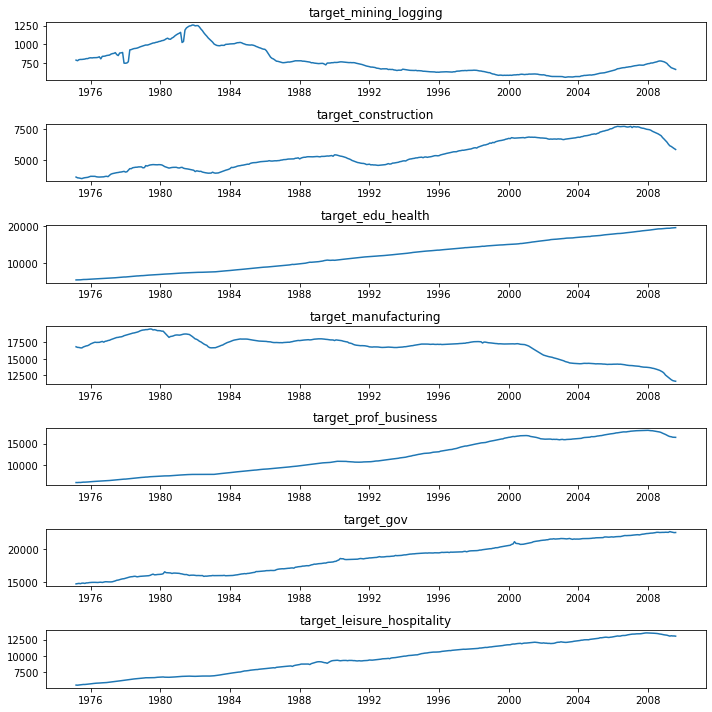

In [69]:
ts_model.plot();
plt.tight_layout();

In [ ]:
ts_model.

In [34]:
plt.figure(figsize=(24,16))
ts_model.plot_forecast(10)
plt.tight_layout();

TypeError: 'VARResultsWrapper' object is not subscriptable

<Figure size 1728x1152 with 0 Axes>

In [74]:
ts_model.forecast(test[target],10,df.drop(columns = target))

ValueError: exog_future only has 554 observations. It must have steps (10) observations.


In [75]:
model.predict(test,)

ValueError: operands could not be broadcast together with shapes (413,7) (1,37) (413,7) 

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
forecast = ts_model.forecast(train.values, len(test))

In [22]:
for i in range(test.shape[1]):
    print(f'The test MSE on the {test.columns[i]} data is: {round(mean_squared_error(test.values[:, i], forecast[:, i]), 4)}')

The test MSE on the avg_weeks_unemployed data is: 140.2184
The test MSE on the cont_claims_insur_unemploy data is: 10325596110681.398
The test MSE on the full_employ_level data is: 85855287.2083
The test MSE on the part_employ_level data is: 14553405.9557
The test MSE on the not_in_labor_force data is: 10314836.4397
The test MSE on the gov_unemp_insur data is: 41683.5752
The test MSE on the labor_particip_women data is: 4.3147
The test MSE on the labor_particip_men data is: 7.2922
The test MSE on the labor_particip_total data is: 5.3716
The test MSE on the real_estate_loans data is: 3239298.178
The test MSE on the consumer_loans data is: 43811.985
The test MSE on the commerc_indust_loans data is: 35725.5832
The test MSE on the m1_real data is: 1368113.9474
The test MSE on the unemp_less_five_weeks data is: 1583981.8753
The test MSE on the unemp_5_to_14_wks data is: 2398395.5167
The test MSE on the unemp_15_to_26_wks data is: 1257051.5088
The test MSE on the unemp_over_27_wks data is: 1

In [23]:
for i in range(test.shape[1]):
    print(f'The test RMSE on the {test.columns[i]} data is: {round(mean_squared_error(squared=False, y_true=test.values[:, i], y_pred=forecast[:, i]), 4)}')

The test RMSE on the avg_weeks_unemployed data is: 11.8414
The test RMSE on the cont_claims_insur_unemploy data is: 3213346.5594
The test RMSE on the full_employ_level data is: 9265.8128
The test RMSE on the part_employ_level data is: 3814.8927
The test RMSE on the not_in_labor_force data is: 3211.6719
The test RMSE on the gov_unemp_insur data is: 204.1656
The test RMSE on the labor_particip_women data is: 2.0772
The test RMSE on the labor_particip_men data is: 2.7004
The test RMSE on the labor_particip_total data is: 2.3177
The test RMSE on the real_estate_loans data is: 1799.805
The test RMSE on the consumer_loans data is: 209.3131
The test RMSE on the commerc_indust_loans data is: 189.0121
The test RMSE on the m1_real data is: 1169.664
The test RMSE on the unemp_less_five_weeks data is: 1258.5634
The test RMSE on the unemp_5_to_14_wks data is: 1548.6754
The test RMSE on the unemp_15_to_26_wks data is: 1121.1831
The test RMSE on the unemp_over_27_wks data is: 3348.4754
The test RMSE 